# **Visualizing adversarial success rates**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
def process_paths(measurement_case, create_dir=True,
                  base_result_path = "../../results/",
                  base_doc_path = "../../doc/",
                  train_round=None):
    """
        Calculates and creates (if needed) paths for visualizing.
        Parameters:
            - measurement_case: measurement name (directory in results directory)
            - create_dir: creates directory in doc folder if True and the target plot directory does not exist
            - base_result_path: path to the results directory
            - base_doc_path: path to the doc directory
            - train_round: which round to use
    """
    meas_path = base_result_path + measurement_case + ("/" if train_round is None else "/round%d/"%train_round)
    plot_path = base_doc_path + measurement_case + "/" 
    
    if (create_dir) and (not(os.path.isdir(plot_path))):
        os.mkdir(plot_path)
    return meas_path, plot_path

## Raw measurements

Plotting accuracy per digit per participants

In [92]:
def plot_raw_accuracies(meas_case, train_round=0, numeric_client=True):
    measurement_path, plot_save_path = process_paths(meas_case, train_round=train_round)
    acc_data = pd.read_csv(measurement_path+"adv_results.csv")
    if not(numeric_client):
        for i in range(10):
            acc_data["name"] = acc_data["name"].replace(to_replace="client%d"%i, value="client"+chr(ord('A')+i))
    plt.figure(figsize=[15, 5])
    '''sns.boxplot(x = "digit", y="accuracy", hue="name", data=acc_data,
               hue_order=["client%d"%i for i in range(10)] if numeric_client else ["client"+chr(ord('A')+i) for i in range(10)],
               whis=[.95, 1.15], 
               showfliers=False)'''
    sns.boxplot(x = "name", y="accuracy", hue="digit", data=acc_data,
               order=["client%d"%i for i in range(10)] if numeric_client else ["client"+chr(ord('A')+i) for i in range(10)],
               showfliers=False,)#orient="h")
    plt.title("Accuracy of clients on different digits\n(%s)"%meas_case)
    plt.legend(title="digit", ncol=2, loc="lower left")
    plt.xlabel("")
    plt.ylim((0.45, 1.05))

### IID without sharing

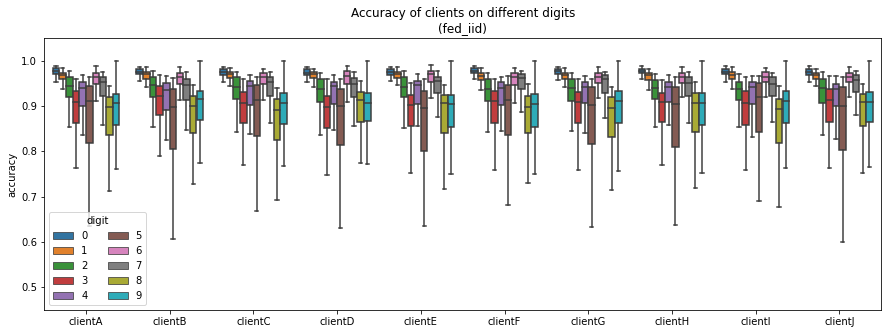

In [93]:
plot_raw_accuracies("fed_iid", numeric_client=False)

### NONIID50 without sharing

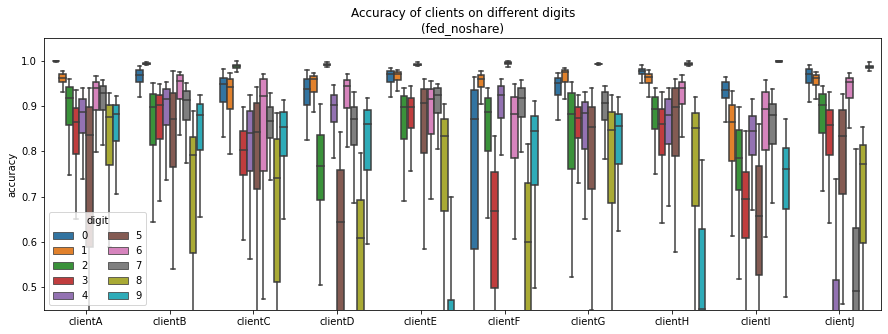

In [94]:
plot_raw_accuracies("fed_noshare", numeric_client=False)

### Sharing minimal fix amount

Text(0.5, 1.0, 'Accuracy of clients on different digits\n(fed_preshare)')

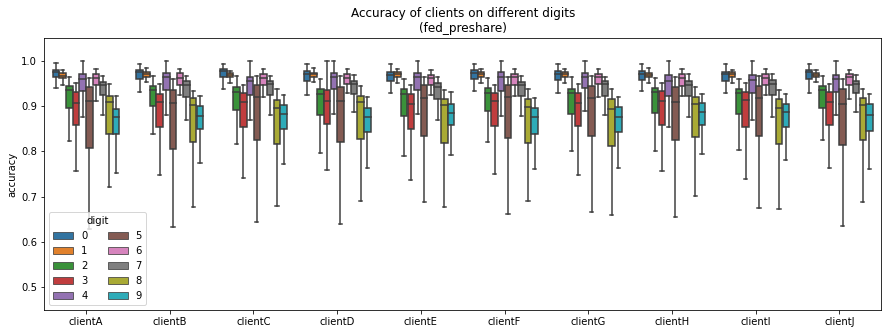

In [95]:
plot_raw_accuracies("fed_fixshare", train_round=3, numeric_client=False)
plt.title("Accuracy of clients on different digits\n(fed_preshare)")

### Sharing minimal changing amount

Text(0.5, 1.0, 'Accuracy of clients on different digits\n(fed_reshare)')

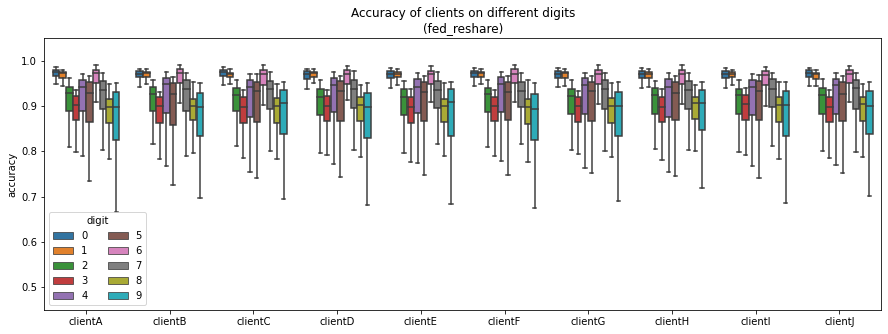

In [96]:
plot_raw_accuracies("fed_changeshare", train_round=7, numeric_client=False)
plt.title("Accuracy of clients on different digits\n(fed_reshare)")

## Processed values

In [4]:
measurements = ["fed_iid", "fed_noshare", "fed_fixshare", "fed_changeshare"]
n_rounds = 10

In [5]:
for meas in measurements:
    avg_acc = 0
    for r in range(n_rounds):
        measurement_path, plot_save_path = process_paths(meas, train_round=r)
        acc_data = pd.read_csv(measurement_path+"adv_results.csv")
        acc_data = acc_data[acc_data["name"] !=  "global"]
        accuracy = 0
        for digit in range(10):
            digit_data = acc_data[acc_data["digit"] == digit]
            grouped_digit = digit_data.groupby("name").mean("accuracy")
            best_client = grouped_digit["accuracy"].idxmax()
            print(digit, best_client)
            if "client%d"%digit == best_client:
                accuracy+=1
        avg_acc += accuracy/10
    print("------------\n%s:\t\t%.4f\n\n"%(meas, avg_acc/n_rounds))

0 client5
1 client4
2 client4
3 client1
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client7
1 client4
2 client4
3 client1
4 client4
5 client8
6 client9
7 client5
8 client3
9 client8
0 client7
1 client4
2 client4
3 client7
4 client3
5 client2
6 client9
7 client5
8 client3
9 client1
0 client6
1 client4
2 client4
3 client9
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client7
1 client4
2 client0
3 client1
4 client7
5 client8
6 client9
7 client5
8 client3
9 client9
0 client7
1 client4
2 client0
3 client1
4 client7
5 client8
6 client4
7 client5
8 client3
9 client1
0 client5
1 client4
2 client4
3 client1
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client5
1 client4
2 client0
3 client1
4 client3
5 client8
6 client9
7 client5
8 client3
9 client1
0 client0
1 client4
2 client0
3 client1
4 client2
5 client8
6 client9
7 client5
8 client3
9 client1
0 client7
1 client6
2 client4
3 client1
4 client7
5 client8
6 client6
7 client5
8 client3
9 client1
